<center><h1>Preliminary analysis of Strava HRM data</h1></center>

In [1]:
.libPaths("~/R/x86_64-redhat-linux-gnu-library/3.2/")
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
library(XML)
library(dplyr)
library(ggplot2)
library(lubridate)
library(reshape2)
library(ggmap)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [322]:
# get list of all GPX files
tracks = list.files("/g/steinmetz/brooks/ph/data/strava/", full.names = T)
existing_data = tracks[grep("^strava(*).*RData",
                            list.files("/g/steinmetz/brooks/ph/data/strava/"))]
# limit to running tracks
tracks = tracks[grep("Run",tracks)]

In [329]:
override = F

if ( (override) && (file.exists(existing_data)) ) {
    if (override) {
        file.remove(existing_data)
    }
    data = do.call(rbind, lapply(tracks, function(f){
    o = try({
        # Parse the GPX file
        pfile = htmlTreeParse(f, useInternalNodes = T)
        # Get all elevations, times coordinates, and heart rate via the respective xpath
        elevations <- as.numeric(xpathSApply(pfile, path = "//trkpt/ele", xmlValue))
        times <- xpathSApply(pfile, path = "//trkpt/time", xmlValue)
        coords <- xpathSApply(pfile, path = "//trkpt", xmlAttrs)
        hr <- as.numeric(xpathSApply(pfile, path = "//trkpt/extensions", xmlValue))
        if (length(hr) == 0) {
            hr = rep(NA, length(elevations))
        }
        # Extract latitude and longitude from the coordinates
        lats <- as.numeric(coords["lat",])
        lons <- as.numeric(coords["lon",])
        # Put everything in a dataframe and get rid of old variables
        data.frame(lat = lats, lon = lons, ele = elevations, time = times, hr = hr)
    })
    if (class(o) != "try-error") {
        return(o)
    } else {
        print(f)
        return(NULL)
    }
    }))
    save(data, 
         file = paste("/g/steinmetz/brooks/ph/data/strava/strava-", Sys.Date(), ".RData",sep = ""))
} else {
    load(existing_data)
}

In [279]:
hd = c(lon = 8.75, lat = 49.4)
sea = c(lon = -122.33, lat = 47.65)
enchanments = c(lon = -120.82, lat = 47.5)

In [266]:
# reference for one line
# hd <- c(left = HD_left, bottom = HD_bottom, right = HD_right, top = HD_top)
# map <- get_map(hd, maptype = "terrain")
# ggmap(map) + 
#     geom_point(data = geodf[1:1000,], aes(x = lon, y = lat, color = hr, size = ele), 
#                alpha = .5) +
#     scale_colour_gradient("Heart Rate", low = "white", high = "red") +
#     scale_size("Elevation", range = c(0, 3))

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.65,-122.33&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 395374 rows containing non-finite values (stat_density2d).

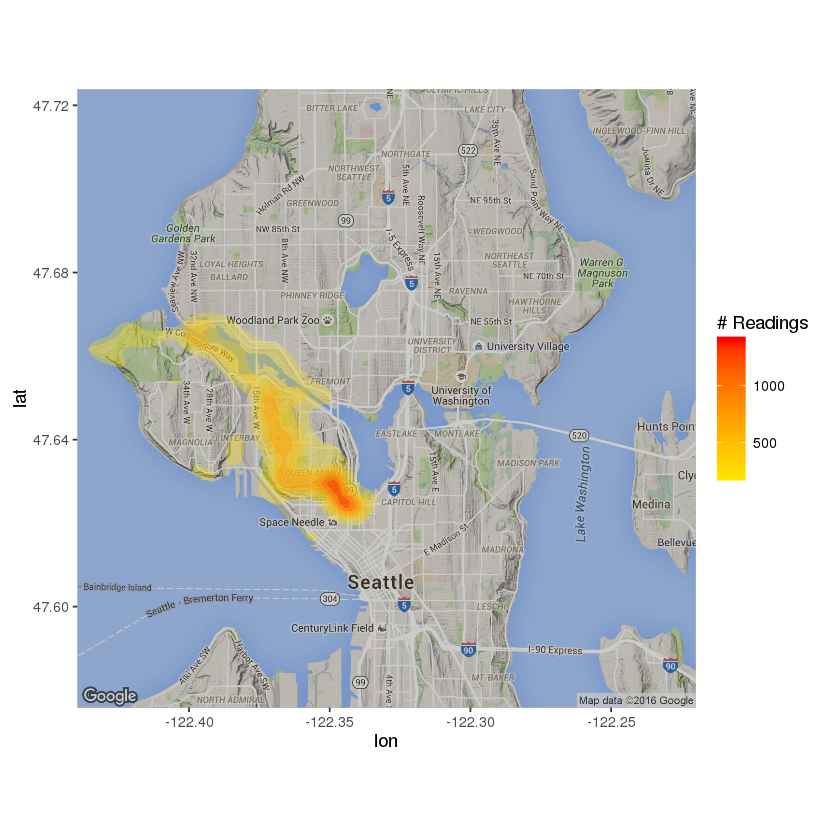

In [333]:
map <- get_map(sea, maptype = "terrain", zoom = 12)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.65,-122.33&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 351099 rows containing non-finite values (stat_density2d).

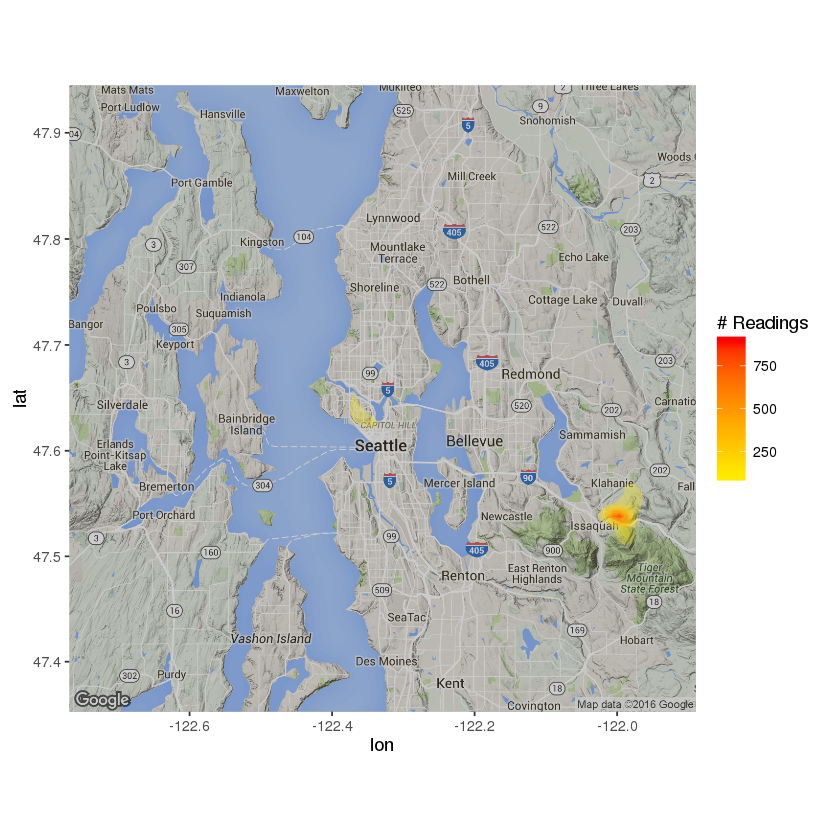

In [336]:
map <- get_map(sea, maptype = "terrain", zoom = 10)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.65,-122.33&zoom=7&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 293528 rows containing non-finite values (stat_density2d).

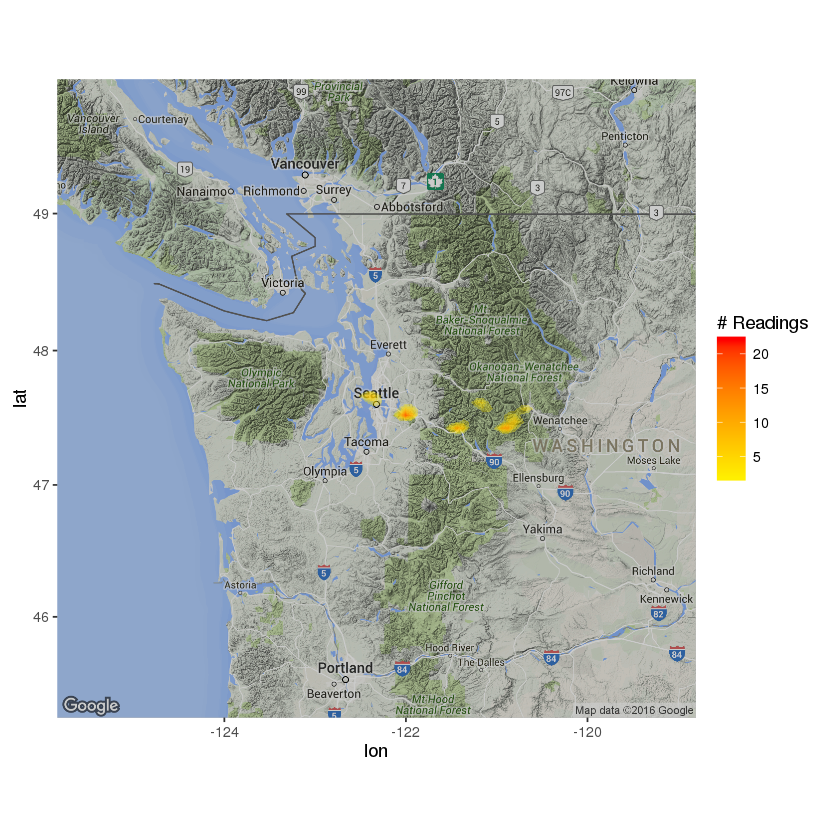

In [337]:
map <- get_map(sea, maptype = "terrain", zoom = 7)
ggmap(map, darken = 0.2) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.5,-120.82&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 3524 rows containing missing values (geom_point).

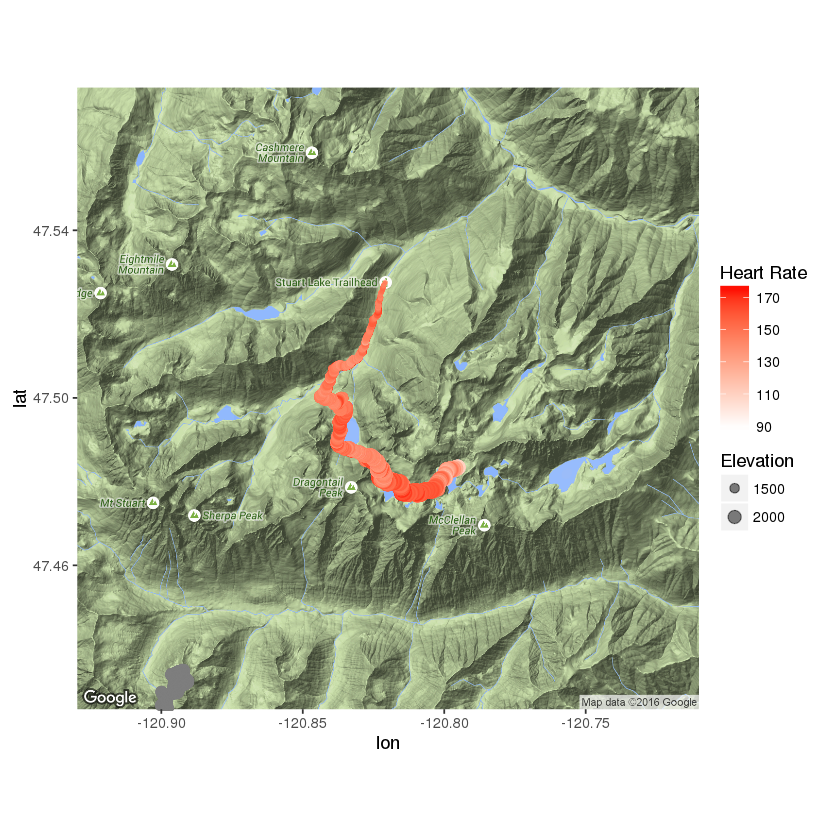

In [353]:
map <- get_map(enchanments, maptype = "terrain", , zoom = 12)
ggmap(map) + 
    geom_point(data = data %>% filter(lon < -120.75 & lon > -120.90), 
               aes(x = lon, y = lat, color = hr, size = ele), 
               alpha = .5) +
    scale_colour_gradient("Heart Rate", low = "white", high = "red") +
    scale_size("Elevation", range = c(0, 4))

<center><h3>Some pictures from the day</h3></center>

<img src="enchanment2.jpg", width = 500px>
<img src="enchanment1.jpg", width = 500px>

<center><h3> And from a climbing trip later that fall</h3></center>
<img src="enchanment3.jpg", width = 500px>

<center><h3>And another from Dragontail Peak</h3></center>
<img src="enchanment4.jpg", width = 500px>

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=49.4,8.75&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 152281 rows containing non-finite values (stat_density2d).

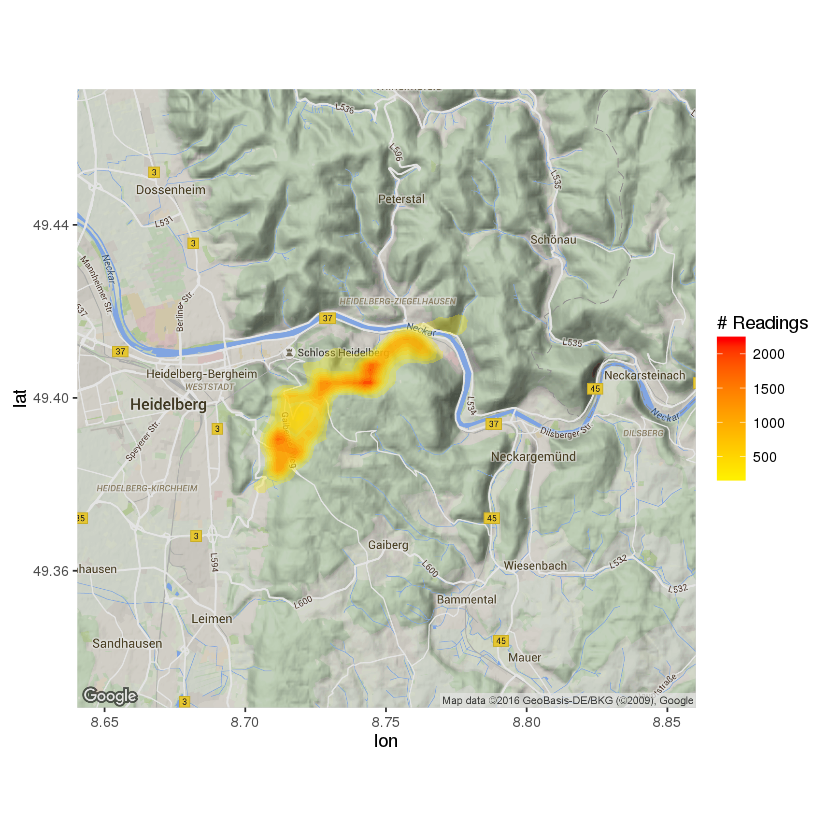

In [343]:
map <- get_map(hd, maptype = "terrain", zoom = 12)
ggmap(map, darken = 0.1) + 
    stat_density_2d(data = data, aes(x = lon, y = lat, fill = ..level..), 
                    geom = "polygon", alpha = .3) +
    scale_fill_gradient2("# Readings", low = "white", mid = "yellow", high = "red")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=49.4,8.75&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
: Removed 144689 rows containing missing values (geom_point).

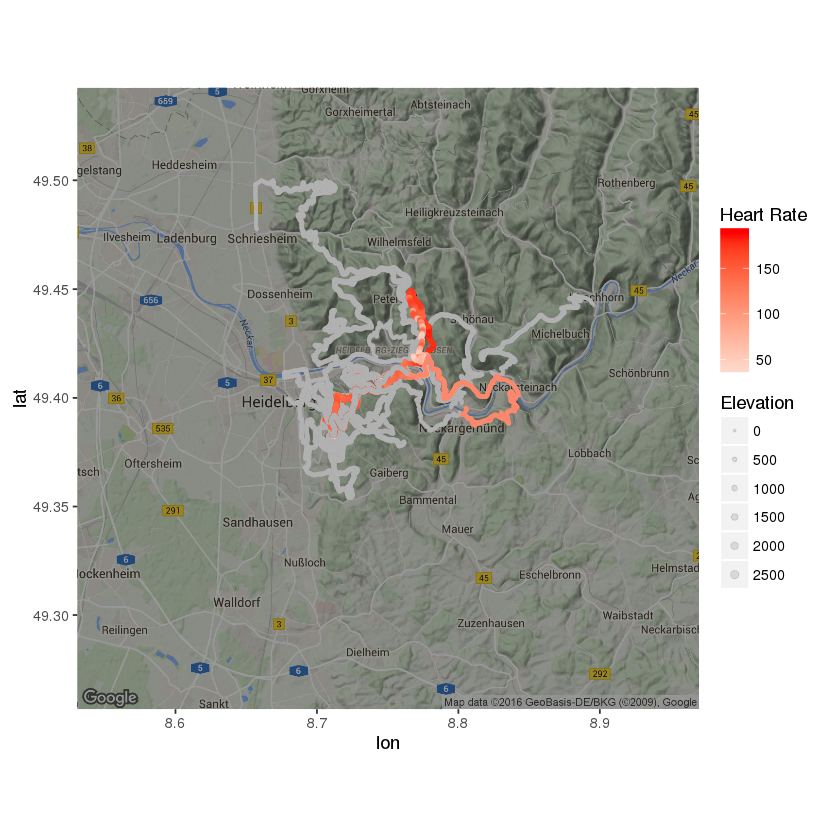

In [364]:
map <- get_map(hd, maptype = "terrain", zoom = 11)
ggmap(map, darken = 0.4) + 
    geom_point(data = data, 
               aes(x = lon, y = lat, color = hr, size = ele), alpha = 0.1) +
    scale_colour_gradient2("Heart Rate", low = "white", high = "red", 
                           na.value = "grey70") +
    scale_size("Elevation", range = c(0, 2))